CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

    0: airplane
    1: automobile
    2: bird
    3: cat
    4: deer
    5: dog
    6: frog
    7: horse
    8: ship
    9: truck


In [ ]:
from keras.datasets import cifar10


(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [ ]:
print("Train X = %s, y = %s" % (train_x.shape, train_y.shape))
print("Test X = %s, y = %s" % (test_x.shape, test_y.shape))

Train X = (50000, 32, 32, 3), y = (50000, 1)
Test X = (10000, 32, 32, 3), y = (10000, 1)


# Visualize 10 examples from each class, in a grid of 10x10 **plots**

this requires looking at the labels and, given a label, return its index.

desired output:
dict {1: [list of 10 imges for 1st class]}...

In [ ]:
import numpy as np 
classes = {}

for i in range(10):
    classes[i] = np.where(train_y==i)[0][:10]

classes

{0: array([ 29,  30,  35,  49,  77,  93, 115, 116, 129, 165]),
 1: array([ 4,  5, 32, 44, 45, 46, 60, 61, 64, 65]),
 2: array([ 6, 13, 18, 24, 41, 42, 47, 48, 54, 55]),
 3: array([ 9, 17, 21, 26, 33, 36, 38, 39, 59, 74]),
 4: array([ 3, 10, 20, 28, 34, 58, 66, 82, 86, 89]),
 5: array([ 27,  40,  51,  56,  70,  81,  83, 107, 128, 148]),
 6: array([  0,  19,  22,  23,  25,  72,  95, 103, 104, 117]),
 7: array([ 7, 11, 12, 37, 43, 52, 68, 73, 84, 85]),
 8: array([  8,  62,  69,  92, 100, 106, 111, 135, 139, 155]),
 9: array([ 1,  2, 14, 15, 16, 31, 50, 53, 67, 71])}

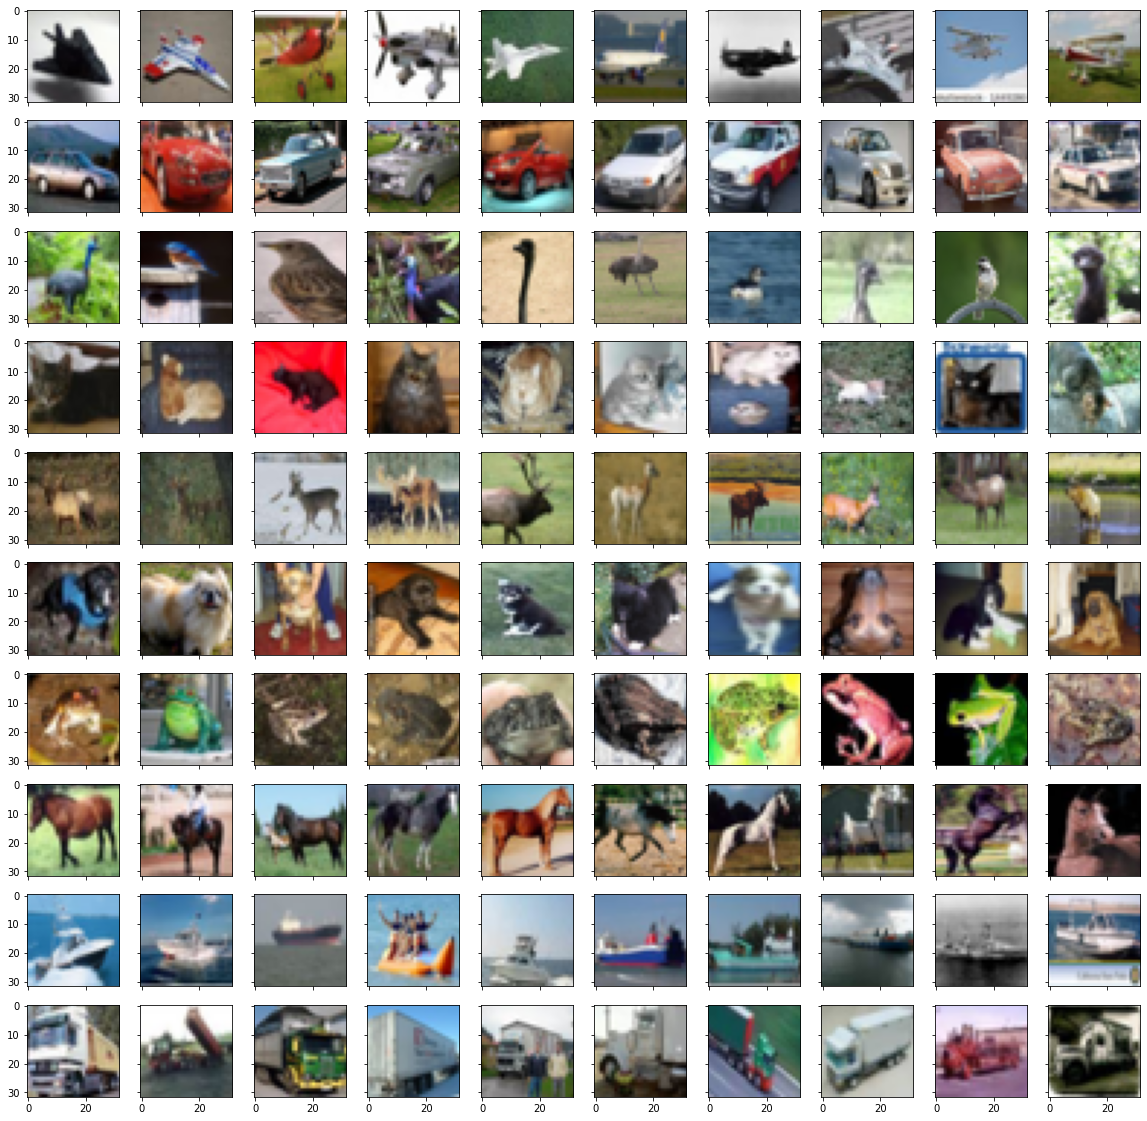

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(10, 10, sharex='col', sharey='row', figsize=(20,20))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(train_x[classes[i][j]])

In [ ]:
# #train_y[10:]
# dict_classes = {0:[], 1: [], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
# for indx in train_y:
#   # print(type(train_y[indx][0][0]))
#   print((dict_classes[train_y[indx][0][0]]))
#   if(len(dict_classes[train_y[indx][0][0]]) <= 10):
#     dict_classes[train_y[indx][0][0]].append(train_x[indx])
  



# Preparing the data

In [ ]:
from keras.utils import to_categorical
train_images = train_x.astype('float32')
test_images = test_x.astype('float32') 
#/ 255

train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

# Building the model
VGG16-style  architecture

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import SGD
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))
	# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	

First, I started with a model that overfits; I trained the model for 100 epochs. It started overfitting from the 20th epoch, so I re-trained it for 20 epochs. Again, it overfitted. So I reduced the model's complexity by removing the last conv layer.


When I tried it again, with the dense layer of 128 units, the model overfitted, again, in the first 5 epochs. so I decreased the number of units to 64 and added a dropout layer.

This increased the test accuracy from 68% to 71%


For the loss function, I used SGD; Gradient descent (with momentum) optimizer.SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.

 stochastic gradient descent refers to using a randomly-selected sample of observations for updating the model, of any size, including a mini-batch of size 1 as a special case.

 A very popular technique that is used along with SGD is called Momentum. Instead of using only the gradient of the current step to guide the search, momentum also accumulates the gradient of the past steps to determine the direction to go.
 
 https://stats.stackexchange.com/questions/242004/why-do-neural-network-researchers-care-about-epochs

# Question to Dr. Ahmed: in thevgg architecture, I found that they have 2 Conv layers followed by Maxpooling?(instead of having 1conv layer followed by Maxpooling) what's the idea behind this approach?
I found this implementation here and I was curious to understand the difference 
https://aigeekprogrammer.com/convolutional-neural-network-4-data-augmentation/

In [ ]:
# from tensorflow.keras.optimizers import RMSprop
# optim  = RMSprop(lr = 0.001)

In [ ]:
# from tensorflow.keras.losses import categorical_crossentropy
# model.compile(optimizer='adam',
#               loss=categorical_crossentropy,
#               metrics=['accuracy'])

In [ ]:

history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split = 0.2, verbose =1)

Epoch 1/20
625/625 [==============================] - 6s 8ms/step - loss: 2.0750 - accuracy: 0.2480 - val_loss: 1.5987 - val_accuracy: 0.4294
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.5312 - accuracy: 0.4487 - val_loss: 1.4479 - val_accuracy: 0.4882
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 1.3693 - accuracy: 0.5120 - val_loss: 1.2740 - val_accuracy: 0.5461
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 1.2298 - accuracy: 0.5639 - val_loss: 1.2015 - val_accuracy: 0.5686
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 1.1382 - accuracy: 0.5987 - val_loss: 1.2583 - val_accuracy: 0.5541
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0401 - accuracy: 0.6342 - val_loss: 1.1019 - val_accuracy: 0.6164
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9647 - accuracy: 0.6621 - val_loss: 1.0346 - val_accuracy: 0.6398
Epoch 

For  120epochs,loss  is slowly decreasing.Thiscouldeduetotheumerofvalid_steps#

In [ ]:
# #vggModel
# score = model.evaluate(test_images, test_labels, verbose=0)
# print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
#1stmodel;simplest
#score = model.evaluate(test_images, test_labels, verbose=0)
#print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.8489103317260742 / Test accuracy: 0.714900016784668


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

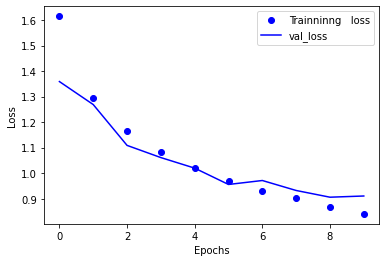

In [ ]:
import matplotlib.pyplot  as  plt
train_loss =     history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(0,10),  train_loss[0:10],  "bo", label = "Trainninng   loss")
plt.plot(range(0,10), val_loss[0:10], "b", label =  "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Assignmet5(in progress...)

# Add Data augmentation using keras ImageDataGenerator.

 the Keras ImageDataGenerator class actually works by:

   1. Accepting a batch of images used for training.
   2. Taking this batch and applying a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.).
 ###  3. *Replacing the original batch with the new, randomly transformed batch*
   4.  Training the CNN on this randomly transformed batch (i.e., the original data itself is not used for training).

   ## $Our  goal $ when applying data augmentation is to increase the generalizability of the model. ##


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
x_train = train_images[:40000]
y_train = train_labels[:40000]

x_valid = train_images[40000:]
y_valid = train_labels[40000:]

In [ ]:

batch_size = 64
train_generator = datagen.flow(x_train, y_train, batch_size = batch_size)

In [ ]:
#steps_per_epoch = 50
print(steps_per_epoch)
# at each epoch, generate 100 images, and randomly pick 64 from them, for training

50




The above generator will be the source of data for the training process. But what about the validation set that will allow us to track progress? Well, we need to define a separate generator. 

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
x_train.shape

(40000, 32, 32, 3)

In [ ]:



valid_steps = x_valid.shape[0] // batch_size
validation_generator = datagen.flow(x_valid, y_valid, batch_size=batch_size)


history = model.fit_generator(
    train_generator, 
   # steps_per_epoch = 50,
    epochs=100 , 
    validation_data = validation_generator,
     validation_steps= x_valid.shape[0] // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
625/625 [==============================] - 27s 43ms/step - loss: 2.1267 - accuracy: 0.2066 - val_loss: 1.8306 - val_accuracy: 0.3359
Epoch 2/100
625/625 [==============================] - 26s 42ms/step - loss: 1.7964 - accuracy: 0.3455 - val_loss: 1.7386 - val_accuracy: 0.3635
Epoch 3/100
625/625 [==============================] - 26s 42ms/step - loss: 1.7100 - accuracy: 0.3823 - val_loss: 1.6837 - val_accuracy: 0.3838
Epoch 4/100
625/625 [==============================] - 27s 42ms/step - loss: 1.6301 - accuracy: 0.4063 - val_loss: 1.5900 - val_accuracy: 0.4221
Epoch 5/100
625/625 [==============================] - 26s 42ms/step - loss: 1.5747 - accuracy: 0.4307 - val_loss: 1.5365 - val_accuracy: 0.4480
Epoch 6/100
625/625 [==============================] - 26s 42ms/step - loss: 1.5229 - accuracy: 0.4526 - val_loss: 1.4915 - val_accuracy: 0.4675
Epoch 7/100
625/625 [==============================] - 26s 42ms/step - loss: 1.4939 - accuracy: 0.4653 - val_loss: 1.4543 - val_ac

acc Decreases   0.6623!!!!!!!!!
When I changed epochs from 20 to 100, accuarcy had a slight increase from 68% to 74.4%.
# Why is the change that small? (only 6%, although data augmentation is expected to greatly improve the accuracy?)
Do I need more epochs? or is it something in the arch.?

Better   accuracy could be achieved  by adding dropout  annd icreasig epochs

QuesetioToDr.Ahmed;LearigismuchslowerwiththeimageDataGeerator.Isitduetothesteps_per_epoch##

In [ ]:
train_images.shape

(50000, 32, 32, 3)

# Task  2:.Perform Transfer Learnuing using 2 pretrained models, using the 3 scenarios discussed in the lecture.

##   1- ConvNet as fixed feature extractor.

Here, we will freeze(keep unchanged) the weights for all of the network except that of the final fully connected layer. This last fully connected layer is replaced with a new one with random weights and only this layer is trained.
### Feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

As we saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely-connected classifier. The first part is called the “convolutional base” of the model. In the case of convnets, “feature extraction” will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output.

In [ ]:


from  keras.applications import  VGG16

conv_base = VGG16(weights = "imagenet", 
                  include_top = False, 
                  input_shape = (32, 32, 3))

In [ ]:
# conv_base.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


### I'll start by extracting images and labels as numpy arrays

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64
num_classes = 10
import numpy as np
def extract_features(x, y, sample_count):
  features = np.zeros(shape=(sample_count, 1, 1, 512))
  labels = np.zeros(shape = (sample_count, num_classes))
  generator = ImageDataGenerator(rescale =  1./255).flow(
    x, 
    y, 
    batch_size = batch_size
  )
  i =0
  for inputs_batch, labels_batch in generator:
   # print(inputs_batch)
    #print(labels_batch)
   # print(labels.shape[0])
  #  print(labels_batch.shape[0])

    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size: (i + 1) * batch_size] = features_batch
    labels[i* batch_size: (i + 1) * batch_size] = labels_batch
    i +=1
    if i * batch_size >= sample_count:
      break
    return features, labels

train_features, train_labels  = extract_features( x_train, y_train, 40000)
#validation_generator = datagen.flow(x_valid, y_valid, batch_size=batch_size)
validation_features, validation_labels = extract_features(x_valid, y_valid, 10000)
test_features, test_labels = extract_features(test_images, test_labels, 10000)

In [ ]:
test_features.shape

(10000, 1, 1, 512)

In [ ]:
train_features = np.reshape(train_features, (40000, 1 * 1* 512))
validation_features = np.reshape(validation_features, (10000, 1 * 1 * 512))
test_features = np.reshape(test_features, (10000, 1 * 1 * 512))

In [ ]:
train_features.shape

(40000, 512)

In [ ]:
validation_labels.shape

(10000, 10)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
Total params: 133,898
Trainable params: 133,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=1 * 1 * 512))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_features, validation_labels))

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0044 - acc: 0.1359 - val_loss: 0.0148 - val_acc: 0.0010
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0026 - acc: 5.0663e-04 - val_loss: 0.0180 - val_acc: 0.0010
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 7.7998e-04 - val_loss: 0.0167 - val_acc: 0.0014
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0015 - acc: 0.0011 - val_loss: 0.0179 - val_acc: 0.0015
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0013 - acc: 0.0076 - val_loss: 0.0219 - val_acc: 0.9948
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0010 - acc: 0.9973 - val_loss: 0.0230 - val_acc: 0.9951
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 5.2475e-04 - acc: 0.9987 - val_loss: 0.0231 - val_acc: 0.9949
Epoch 8/10
625/625 [==============================] - 2s 3ms/ste

# Resources:

https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/